## for testing modeling

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from boundary import *
from tools import *
from oper import *


In [3]:
nx = 401
nz = 401
nt = 2001
npml = 20

dx = 10.
dz = 10.
dt = 1e-3

fmax = 24

nshot = 2
fshot_x = 200
dshot_x = 0
fshot_z = 200
dshot_z = 0

nrcv = nx
frcv_x = 1
drcv_x = 1
frcv_z = 1
drcv_z = 0

geom_ID = 1

no = 2
rtype = np.float32

## set cpml

In [4]:
nx_e = nx + 2*npml
nz_e = nz + 2*npml
a_x,a_xh,a_z,a_zh,b_x,b_xh,b_z,b_zh=gen_cpml(npml,fmax,dx,dt,nx_e,nz_e,rtype)

## set model

In [5]:
vp=np.ones((nz,nx),rtype)*3000
rho=np.ones((nz,nx),rtype)*1.

In [6]:
vp_e = vel_exp(nx,nz,no,npml,rtype,vp)
rho_e = vel_exp(nx,nz,no,npml,rtype,rho)

In [7]:
vp_e = vp_e[no:no+nz_e,no:no+nx_e]
rho_e = rho_e[no:no+nz_e,no:no+nx_e]

## set geometry

In [8]:
sx,sz = ass_shot(nshot,fshot_x,dshot_x,fshot_z,dshot_z,npml,no)

In [9]:
ishot=0

In [10]:
rx,rz = ass_rcv(ishot,nrcv,frcv_x,drcv_x,frcv_z,drcv_z,npml,no,geom_ID)

## set source

In [11]:
source=ricker(nt,dt,fmax,rtype)

In [12]:
C=np.array([1.12500000000000, -0.0416666666666667])

## do modeling

In [13]:
ss,wave=forward(ishot,vp_e,nx,nz,nt,npml,no,dx,dz,dt,source,
            sx,sz,rx,rz,
            nrcv,
            C,
           a_x,a_xh,a_z,a_zh,
           b_x,b_xh,b_z,b_zh,rtype)

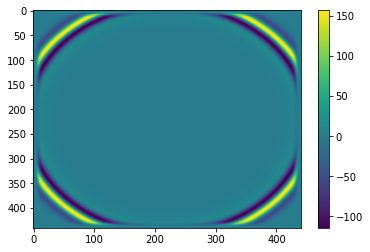

In [14]:
plt.imshow(wave[1000,:,:],aspect='auto')
plt.colorbar()